In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("cache_miss/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 11/11 [00:00<00:00, 31.49it/s]


View Calltree

In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

6.937 main
├─ 2.004 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.300 comm
│  └─ 0.300 comm_large
│     ├─ 0.024 MPI_Recv
│     └─ 0.010 MPI_Send
├─ 3.614 comp
│  └─ 3.614 comp_large
├─ 0.190 correctness_check
└─ 0.056 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 6.94 indices: {'profile': 412953893})
█ 6.24 - 6.94
█ 4.86 - 6.24
█ 3.47 - 4.86
█ 2.08 - 3.47
█ 0.69 - 2.08
█ 0.00 - 0.69

name User code    ◀  Only in left graph    ▶  Only in right graph



In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cache_misses,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
412953893,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a33554432-t1.cali,true,true,true,true,1730138046,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 33554432, 1]",c,merge,mpi,int,4,33554432,Random,16,strong,2,online
520529062,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a67108864-t2.cali,true,true,true,true,1730138152,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 67108864, 2]",c,merge,mpi,int,4,67108864,ReverseSorted,16,strong,2,online
927175906,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a67108864-t0.cali,true,true,true,true,1730138125,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 67108864, 0]",c,merge,mpi,int,4,67108864,Sorted,16,strong,2,online
1396279553,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a33554432-t0.cali,true,true,true,true,1730138064,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 33554432, 0]",c,merge,mpi,int,4,33554432,Sorted,32,strong,2,online
1666899700,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a67108864-t2.cali,true,true,true,true,1730138142,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 67108864, 2]",c,merge,mpi,int,4,67108864,ReverseSorted,32,strong,2,online
1804574120,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a33554432-t2.cali,true,true,true,true,1730138044,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 33554432, 2]",c,merge,mpi,int,4,33554432,ReverseSorted,32,strong,2,online
1940914964,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a33554432-t2.cali,true,true,true,true,1730138046,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 33554432, 2]",c,merge,mpi,int,4,33554432,ReverseSorted,16,strong,2,online
2224863000,2.11.0,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p16-a33554432-t0.cali,true,true,true,true,1730138026,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 33554432, 0]",c,merge,mpi,int,4,33554432,Sorted,16,strong,2,online
2399555700,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,true,p32-a33554432-t1.cali,true,true,true,true,1730138061,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./merge_sort, 33554432, 1]",c,merge,mpi,int,4,33554432,Random,32,strong,2,online


Group Performance data by `matrix_size` in the Thicket metadata table.

In [5]:
tk.metadata_column_to_perfdata("num_procs", overwrite=True)
tk.metadata_column_to_perfdata("input_size", overwrite=True)
tk.metadata_column_to_perfdata("input_type", overwrite=True)

# tk.dataframe = tk.dataframe.reset_index().set_index(
#     ["node", "num_procs", "matrix_size"]
# ).sort_index()

tk.dataframe = tk.dataframe.reset_index().set_index(
    ["node", "num_procs", "input_size", "input_type"]
).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type                  
{'name': 'main', 'type': 'function'} 16        33554432   Random          412953893   
                                                          ReverseSorted  1940914964   
                                                          Sorted         2224863000   
                                               67108864   Random         3017653978   
                                                          ReverseSorted   520529062   

                                                                         nid  \
node                                 num_procs input_size input_type           
{'name': 'main', 'type': 'function'} 16        33554432   Random         1.0   
                                                          ReverseSorted  1.0   
                                                          Sorted         1.0   
                                               67108864   Random         1.0   
                                                          ReverseSorted  1.0   

                                                                          spot.channel  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 16        33554432   Random         regionprofile   
                                                          ReverseSorted  regionprofile   
                                                          Sorted         regionprofile   
                                               67108864   Random         regionprofile   
                                                          ReverseSorted  regionprofile   

                                                                         Min time/rank  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 16        33554432   Random              6.936070   
                                                          ReverseSorted       5.762137   
                                                          Sorted              5.922146   
                                               67108864   Random             13.017673   
                                                          ReverseSorted      10.922122   

                                                                         Max time/rank  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 16        33554432   Random              6.937870   
                                                          ReverseSorted       5.763453   
                                                          Sorted              5.928193   
                                               67108864   Random             13.018819   
                                                          ReverseSorted      10.924091   

                                                                         Avg time/rank  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 16        33554432   Random              6.937385   
                                                          ReverseSorted       5.762851   
                                                          Sorted              5.926119   
                                               67108864   Random             13.018314   
                                                          ReverseSorted      10.923428   

                                                                         Total time  \
node                                 num_procs input_size input_type                  
{'name': 'main', 'type': 'function'} 16        33554432   Random         110.998167   
                                                          ReverseSorted   92.205616   
                                 

In [11]:
# Define common variables
# processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# exps = [16, 18, 20, 22, 24, 26, 28
processes = [16, 32]
exps = [25, 26]
input_types = ["Sorted", "Random", "ReverseSorted"]
# matrix_sizes = [128, 1024, 8192]
# master_plots = ['whole_computation', 'master_initialization', 'master_send_recieve']
save = True

In [12]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [13]:
def plot_mpl(dfs, title, xlabel, ylabel, legend=None, markers=["o"], save=False):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    for df, marker in zip(dfs, markers):
        ax.plot(
            df,
            marker=marker,
            markersize=10
        )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if legend is not None:
        ax.legend(legend)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    if save:
        plt.savefig(f"plots_cm/{title}.jpg", bbox_inches='tight')
#     plt.close(fig)
    plt.show()
    return fig, ax

def plot_mpl_notdf(x, y, title, xlabel, ylabel, legend=None, markers=["o"], save=False):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if legend is not None:
        ax.legend(legend)
    plt.xscale("log", base=2)
    plt.xticks(x)
    ax.set_xticklabels(x)
    if save:
        plt.savefig(f"plots/{title}.jpg", bbox_inches='tight')
#     plt.close(fig)
    plt.show()

Plot Cache Misses

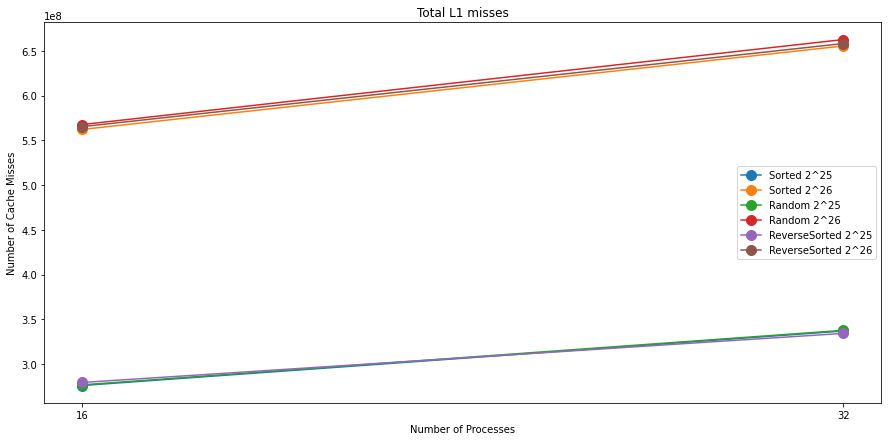

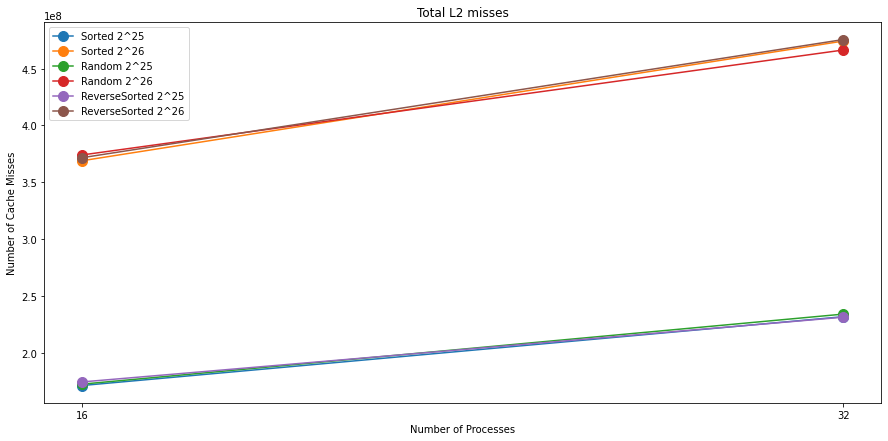

In [14]:
# # print(tk.dataframe.loc[node, "Min time/rank"].unstack(level=["input_size", "input_type"])[size])

for node in tk.graph.traverse():
#     if node.frame['name'] == 'main' or "MPI" in node.frame['name']:
#     if node.frame['name'] not in plots:
    if "main" not in node.frame['name']:
        continue
    
    name = node.frame['name']
#     if "data_init_X" in name:
#         name = 'data_init_runtime'
    
#     for exp in exps:
#         size = int(2**exp)
#         dfs = []
#         legend = []
#         for input_type in input_types:
#             dfs.append(tk.dataframe.loc[node, "Total L1 misses"].unstack(level=["input_size", "input_type"])[size][input_type])
#             legend.append(f"L1 misses - {input_type}")
#             dfs.append(tk.dataframe.loc[node, "Total L2 misses"].unstack(level=["input_size", "input_type"])[size][input_type])
#             legend.append(f"L2 misses - {input_type}")
            
#         markers = ["o"] * len(dfs)
#         plot_mpl(
#             dfs,
#             f"Cache Misses for 2^{exp} elements", 
#             "Number of Processes", 
#             "Number of Cache Misses (1e19)",
#             legend,
#             markers,
#             save=False
#         )

    dfs = []
    legend = []
    for cache in ["Total L1 misses", "Total L2 misses"]:
        dfs = []
        legend = []
        for input_type in input_types:
            for exp in exps:
                size = int(2**exp)
                dfs.append(tk.dataframe.loc[node, cache].unstack(level=["input_size", "input_type"])[size][input_type])
                legend.append(f"{input_type} 2^{exp}")
            
        markers = ["o"] * len(dfs)
        plot_mpl(
            dfs,
            f"{cache}",
            "Number of Processes", 
            "Number of Cache Misses",
            legend,
            markers,
            save=save
        )
        
        


In [16]:
ljusts = [20, 10, 25, 0]

for node in tk.graph.traverse():
#     if node.frame['name'] == 'main' or "MPI" in node.frame['name']:
#     if node.frame['name'] not in plots:
    if "main" not in node.frame['name']:
        continue
    
    name = node.frame['name']
    if "data_init_X" in name:
        name = 'data_init_runtime'
    
    for cache in ["Total L1 misses", "Total L2 misses"]:
        rows = []
        for input_type in input_types:
            for numProcs in [16, 32]:
                row = []
                row.append(input_type)
                row.append(numProcs)
                for exp in exps:
                    size = int(2**exp)
                    row.append(tk.dataframe.loc[node, cache].unstack(level=["input_size", "input_type"])[size][input_type][numProcs])
#                     row.append(tk.dataframe.loc[node, "Total L2 misses"].unstack(level=["input_size", "input_type"])[size][input_type][numProcs])

                rows.append(row)
             
    
        print(f"{cache}")
        print("---------------------------------------")
        print("Input Type       Processes    2^25 Cache Misses        2^26 Cache Misses")
        for row in rows:
            printRow = ""
            for i in range(len(row)):
                printRow += str(row[i]).ljust(ljusts[i])
            print(printRow)
        print()
            

Total L1 misses
---------------------------------------
Input Type       Processes    2^25 Cache Misses        2^26 Cache Misses
Sorted              16        275983609.0              562182659.0
Sorted              32        336895199.0              655443072.0
Random              16        276738210.0              567614886.0
Random              32        337615329.0              662576988.0
ReverseSorted       16        279406162.0              565321708.0
ReverseSorted       32        334216372.0              658136524.0

Total L2 misses
---------------------------------------
Input Type       Processes    2^25 Cache Misses        2^26 Cache Misses
Sorted              16        171120796.0              368993357.0
Sorted              32        231689590.0              474288685.0
Random              16        172329514.0              374072612.0
Random              32        233954285.0              466412985.0
ReverseSorted       16        174277486.0              371652263.0
Reve